# Final Project "Real Estate Price Prediction and Analysis"

# by Kozhakhmet Nagashybaiuly and Elnur Alibaev 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [6]:
data = pd.read_csv("/Users/kozhahmet/Desktop/202212-08-Real-Estate-Price-Prediction-main/datasets/data_cleaned.csv", index_col=0)

In [5]:
# Split X, y into test and training data.

X = data.drop(columns="price")           
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Split X, y.

X = data.drop(columns="price")           
y = data["price"]

In [7]:
data.head()

,price,bed,bath,house_size,city_enc,zip_enc,state_Puerto Rico,state_Massachusetts,state_Connecticut,state_New Jersey,state_New York,state_New Hampshire,state_Vermont,state_Rhode Island,state_Wyoming,state_Maine,state_Georgia,state_Pennsylvania,state_Delaware
0,105000.0,3.0,2.0,920.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
1,80000.0,4.0,2.0,1527.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
2,67000.0,2.0,1.0,748.0,114611.845711,113752.971131,1,0,0,0,0,0,0,0,0,0,0,0,0
3,145000.0,4.0,2.0,1800.0,199673.107143,168305.581318,1,0,0,0,0,0,0,0,0,0,0,0,0
5,179000.0,4.0,3.0,2520.0,196619.034149,144958.974359,1,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
data.describe()

,price,bed,bath,house_size,city_enc,zip_enc,state_Puerto Rico,state_Massachusetts,state_Connecticut,state_New Jersey,state_New York,state_New Hampshire,state_Vermont,state_Rhode Island,state_Wyoming,state_Maine,state_Georgia,state_Pennsylvania,state_Delaware
count,7.130300e+04,71303.000000,71303.000000,71303.000000,7.130300e+04,7.130300e+04,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000,71303.000000
mean,7.905981e+05,3.141747,2.386435,1910.238026,7.918373e+05,7.922671e+05,0.027474,0.112141,0.158773,0.212922,0.238868,0.030658,0.020322,0.041962,0.000014,0.033070,0.000056,0.107653,0.016086
std,1.149679e+06,1.298813,1.122158,1130.580916,7.040017e+05,8.089366e+05,0.163462,0.315542,0.365467,0.409376,0.426395,0.172390,0.141099,0.200503,0.003745,0.178821,0.007490,0.309944,0.125808
min,5.000000e+02,1.000000,1.000000,100.000000,7.657774e+04,7.657774e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.749000e+05,2.000000,2.000000,1152.000000,3.753118e+05,3.387942e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.000000,1617.000000,5.141278e+05,5.228285e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.990000e+05,4.000000,3.000000,2370.000000,8.542516e+05,8.425854e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.311800e+07,8.000000,6.000000,19110.000000,5.633868e+06,5.525596e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Training

# 1) Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score_lr = r2_score(y_test, y_pred)

print(score_lr)

0.6209409681815083


In [11]:
el = ElasticNet(random_state=0)
el.fit(X_train, y_train)
y_pred = el.predict(X_test)
score_el = r2_score(y_test, y_pred)
print(score_el)

0.6160006631913381


In [13]:
# tuning lasso and ridge
lasso_scores = []
ridge_scores = []
for i in range(1, 100, 2):
    lasso = Lasso(alpha=i,max_iter=2000)
    ridge = Ridge(alpha=i)
    
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    y_pred_lasso = lasso.predict(X_test)
    y_pred_ridge = ridge.predict(X_test)
    
    lasso_score = r2_score(y_test, y_pred_lasso)
    ridge_score = r2_score(y_test, y_pred_ridge)
    
    lasso_scores.append(round(lasso_score, 8))
    ridge_scores.append(round(ridge_score, 8))

/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+15, tolerance: 7.437e+12
  model = cd_fast.enet_coordinate_descent(
/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.55047e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.943e+14, tolerance: 7.437e+12
  model = cd_fast.enet_coordinate_descent(
/home/elnur/.local/lib/python3.10/site-packages/sk

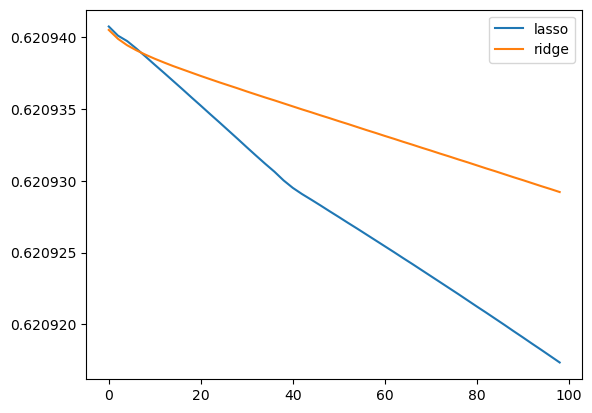

In [14]:
x = range(0, 100, 2)
plt.ticklabel_format(style='plain',useOffset=False, axis='both')
plt.plot(x, lasso_scores, label="lasso")
plt.plot(x, ridge_scores, label="ridge")
plt.legend()
plt.show()

# 2) Polynomial Regression

In [17]:
lr_scores_poly = []
lasso_scores_poly = []
ridge_scores_poly = []
for i in range(1,4):
    poly = PolynomialFeatures(degree=i)
    poly.fit(X_train)
    X_train_modified = poly.transform(X_train)
    poly.fit(X_test)
    X_test_modified = poly.transform(X_test)

    lr = LinearRegression()
    lasso = Lasso(max_iter=2000)
    ridge = Ridge()
    
    lr.fit(X_train_modified, y_train)
    lasso.fit(X_train_modified, y_train)
    ridge.fit(X_train_modified, y_train)
    
    y_pred_lr = lr.predict(X_test_modified)
    y_pred_lasso = lasso.predict(X_test_modified)
    y_pred_ridge = ridge.predict(X_test_modified)
    
    score_lr = r2_score(y_test, y_pred_lr)
    score_lasso = r2_score(y_test, y_pred_lasso)
    score_ridge = r2_score(y_test, y_pred_ridge)
    
    print(score_lr, score_lasso, score_ridge)
    
    lr_scores_poly.append(score_lr)
    lasso_scores_poly.append(score_lasso)
    ridge_scores_poly.append(score_ridge)

/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+15, tolerance: 7.437e+12
  model = cd_fast.enet_coordinate_descent(
/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.55047e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.6209409681814039 0.6209407603617716 0.6209405215579522


/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.950e+15, tolerance: 7.437e+12
  model = cd_fast.enet_coordinate_descent(
/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05565e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.7912065006348352 0.7912409242724321 0.7912401520510045


/home/elnur/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.145e+15, tolerance: 7.437e+12
  model = cd_fast.enet_coordinate_descent(


0.7978566653180654 0.7995860034573145 0.7948852461338765


In [18]:
print(lr_scores_poly)
print(lasso_scores_poly) 
print(ridge_scores_poly)

[0.6209409681814039, 0.7912065006348352, 0.7978566653180654]
[0.6209407603617716, 0.7912409242724321, 0.7995860034573145]
[0.6209405215579522, 0.7912401520510045, 0.7948852461338765]


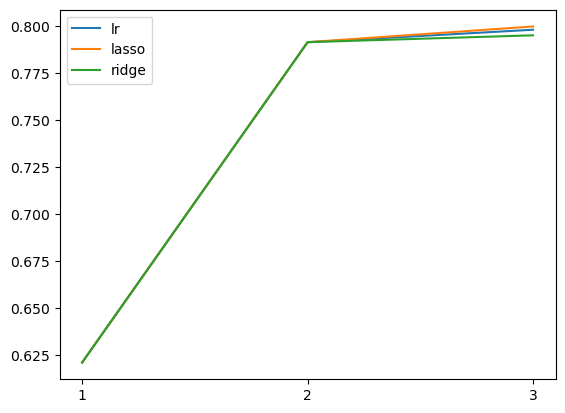

In [19]:
x = range(1,4)
plt.plot(x, lr_scores_poly, label="lr")
plt.plot(x, lasso_scores_poly, label="lasso")
plt.plot(x, ridge_scores_poly, label="ridge")
plt.xticks(x)
plt.legend()
plt.show()

# 3) Decision Tree Classifier

In [20]:
# Basic situation using mse criterion(squared_error).
DT = DecisionTreeRegressor(criterion='squared_error')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.723100679832426
DecisionTreeRegressor MSE: 385779347621.4016


In [21]:
#Try different splitter
DT = DecisionTreeRegressor(criterion='squared_error', splitter='best')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.7181213738491236
DecisionTreeRegressor MSE: 392716574526.4125


In [22]:
#Try different splitter
DT = DecisionTreeRegressor(criterion='squared_error', splitter='random')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.716093268827174
DecisionTreeRegressor MSE: 395542153989.01984


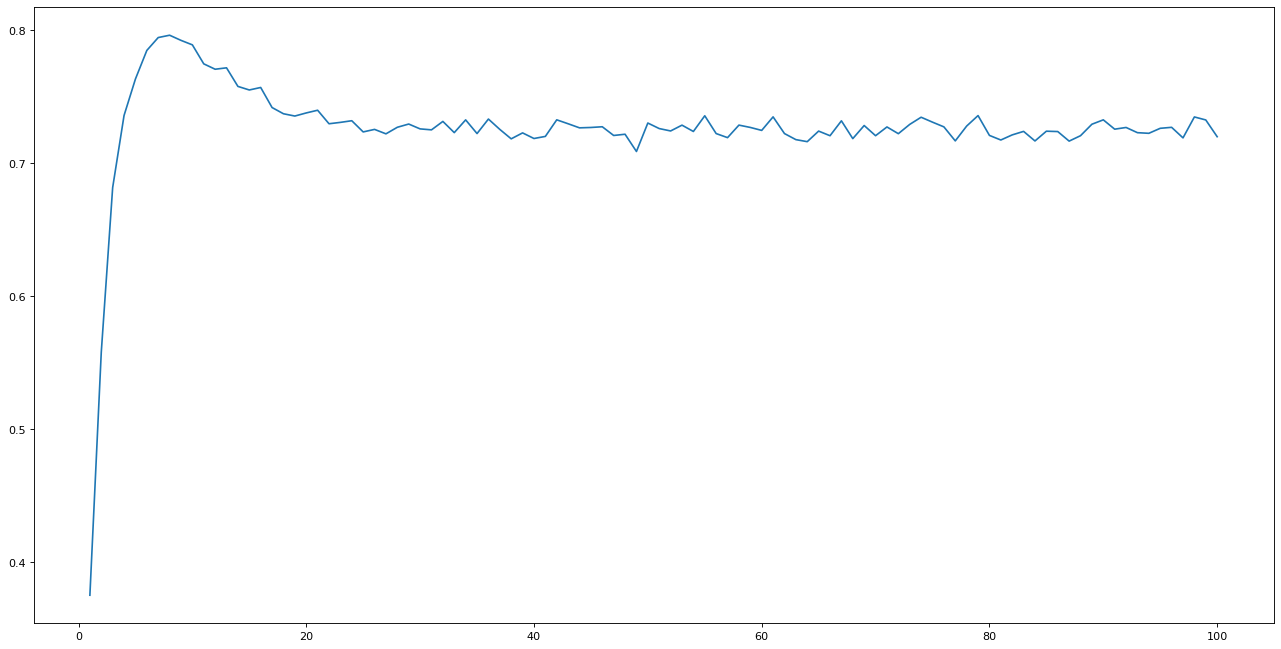

In [23]:
#Finding the best max_depth for model
test = []
for i in range(100):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = i+1)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,101), test)
plt.show()

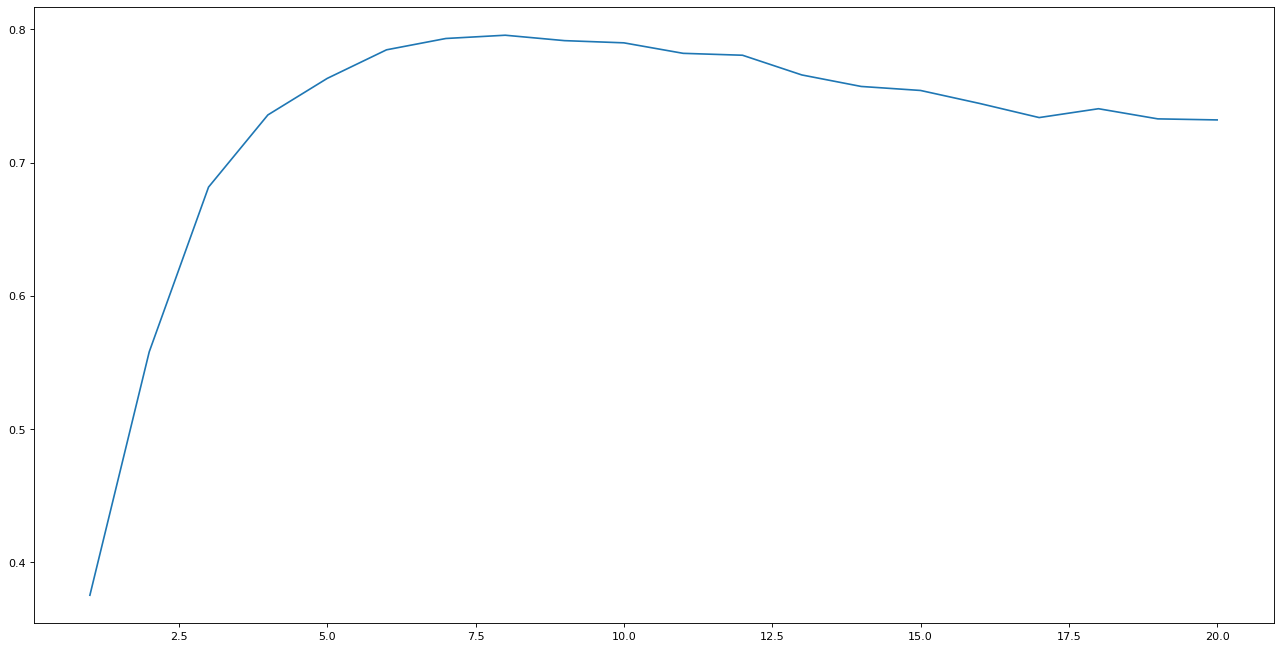

In [24]:
# Finding the best max_depth for model.
test = []
for i in range(20):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = i+1)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,21), test)
plt.show()

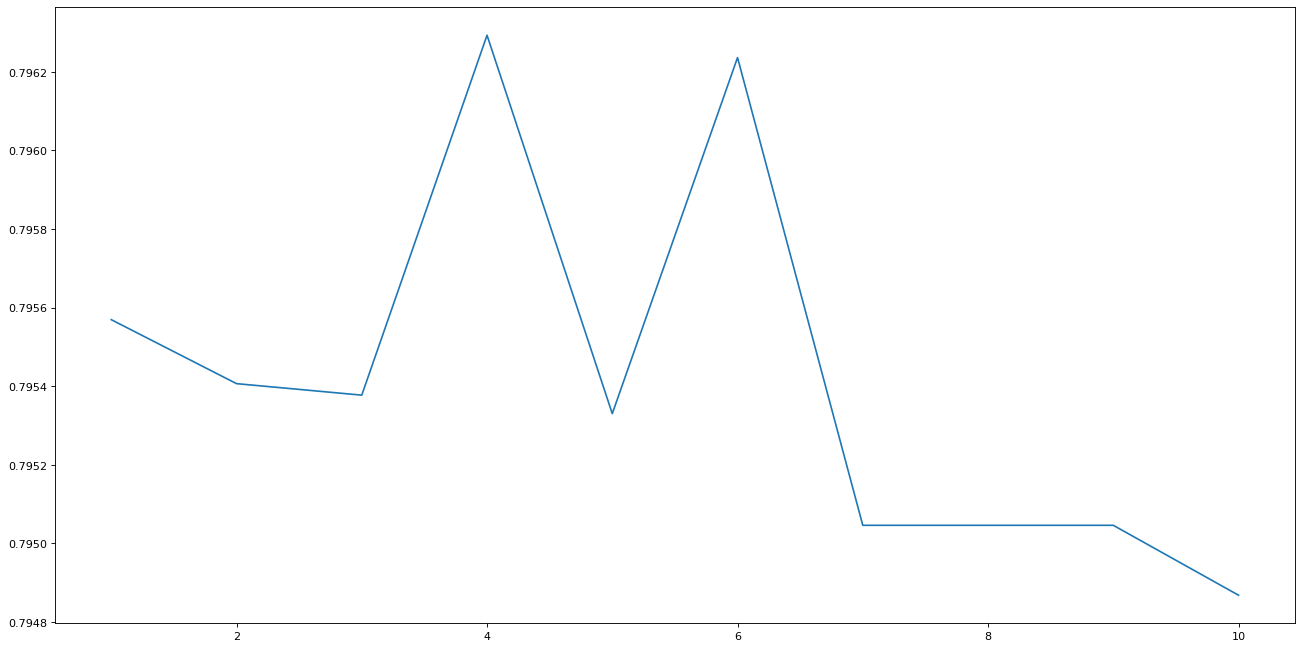

In [25]:
# Finding the best min_samples_split for model.
test = []
for i in range(10):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, min_samples_split=i+2)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,11), test)
plt.show()

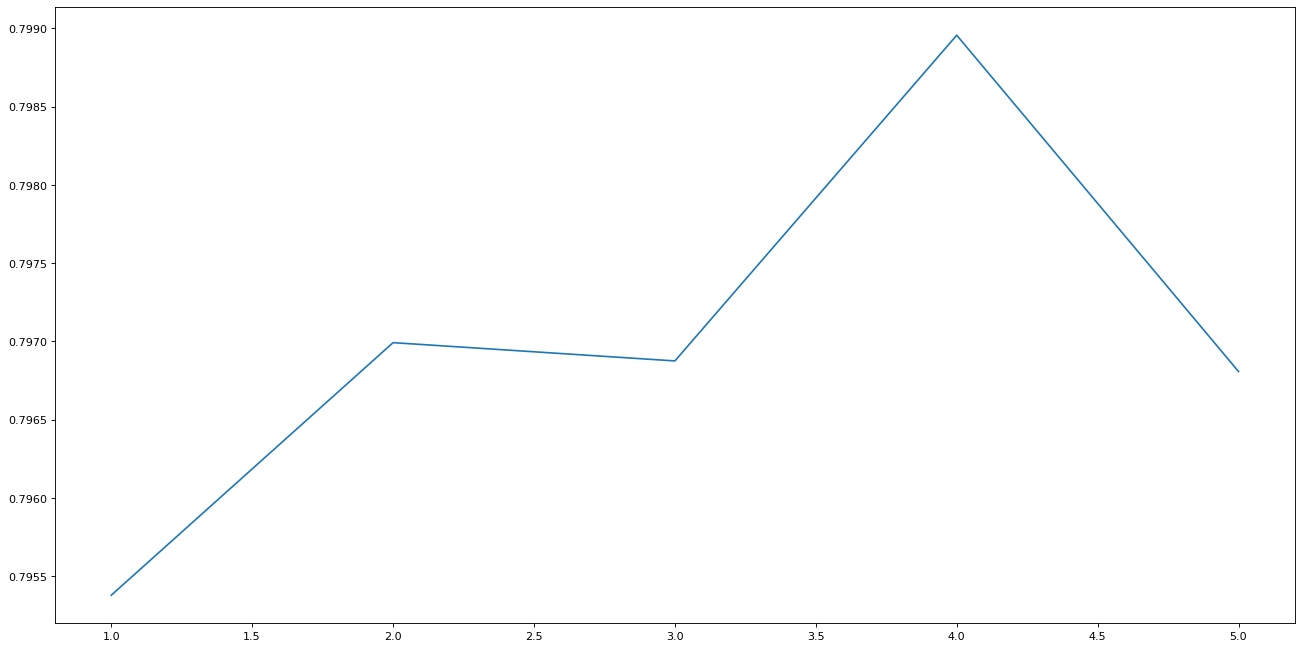

In [26]:
# Finding the best min_samples_leaf for model.

test = []
for i in range(5):
  DTR = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, min_samples_split=3, min_samples_leaf=i+1)
  DTR.fit(X_train, y_train)
  y_pred = DTR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,6), test)
plt.show()

In [27]:
# Final Performance

DT = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth = 8, min_samples_split=3, min_samples_leaf=4)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

print("DecisionTreeRegressor R2 Score:", r2_score(y_test, y_pred))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_pred))

DecisionTreeRegressor R2 Score: 0.7987989726511637
DecisionTreeRegressor MSE: 280315607219.3179


# 4) Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, min_samples_split=10, min_samples_leaf=1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('R2: {:.2f}%.'.format(r2_score(y_test, y_pred)*100))

R2: 83.39%.


# 5) XGB Classifier

In [32]:
from xgboost import XGBRegressor

In [33]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)

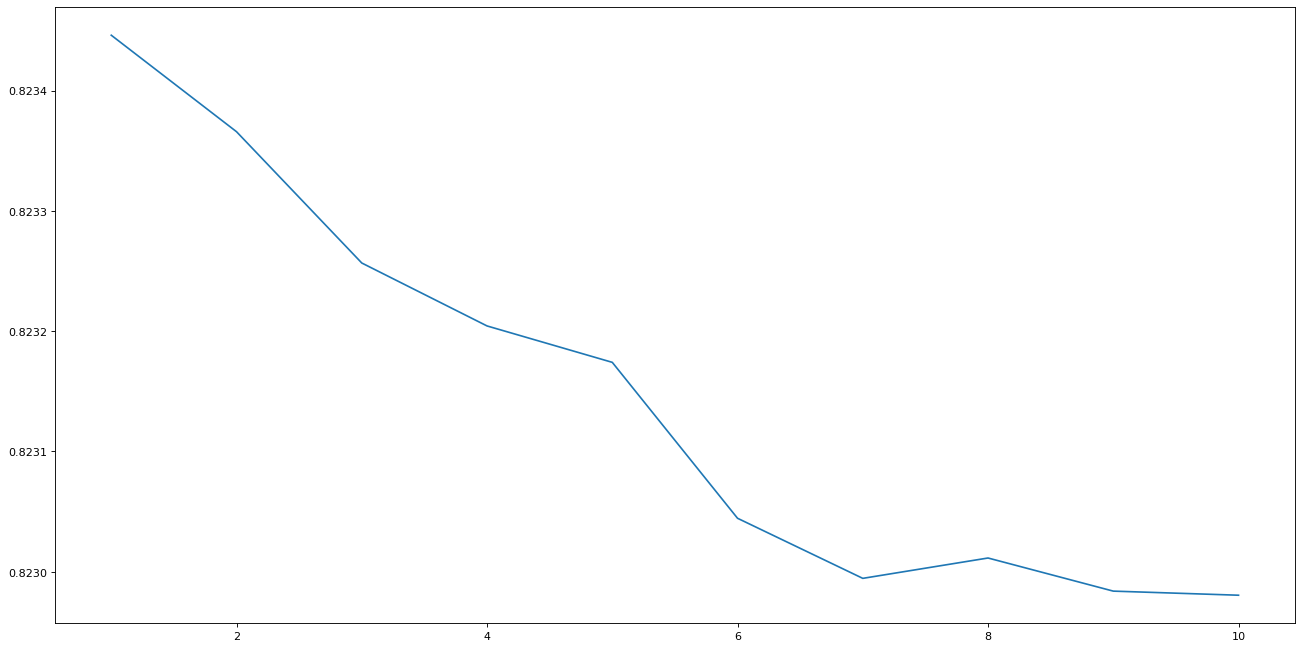

In [34]:
# Finding the best n_estimators for model.

test = []
for i in range(10):
  XGBR = XGBRegressor(n_estimators = i*25 + 1600)
  XGBR.fit(X_train, y_train)
  y_pred = XGBR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,11), test)
plt.show()

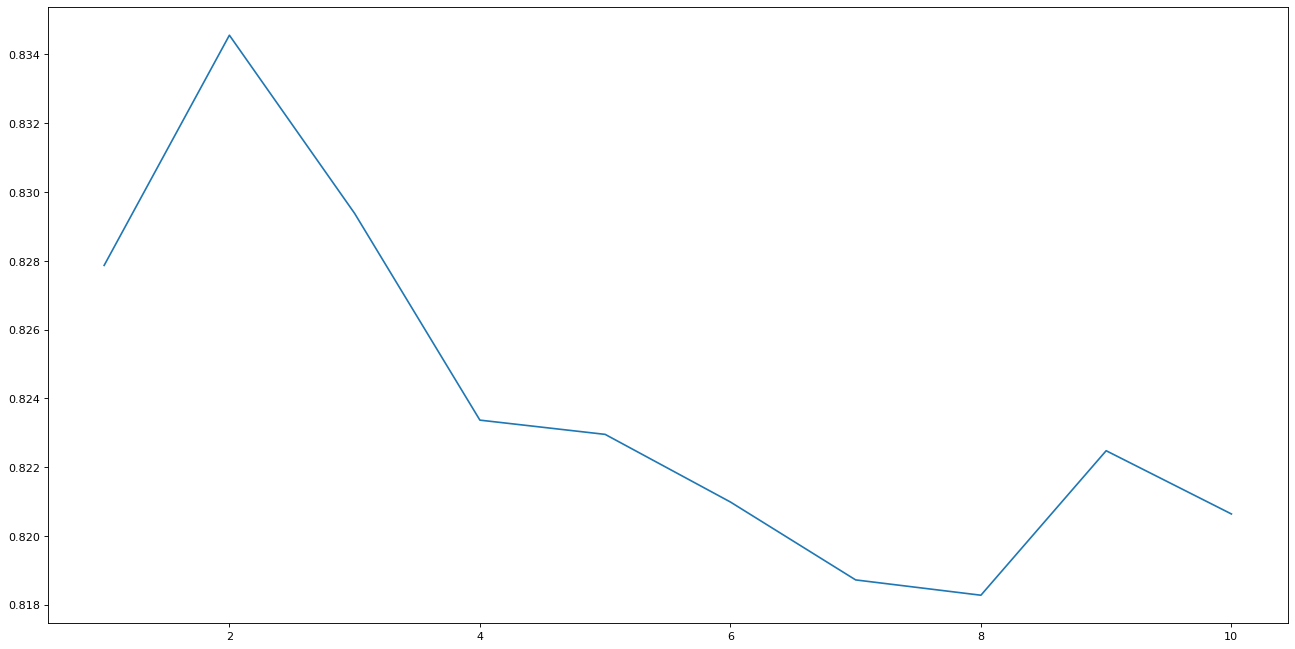

In [35]:
# Finding the best max_depth for model.

test = []
for i in range(10):
  XGBR = XGBRegressor(n_estimators = 1625, max_depth = 3 + i)
  XGBR.fit(X_train, y_train)
  y_pred = XGBR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,11), test)
plt.show()

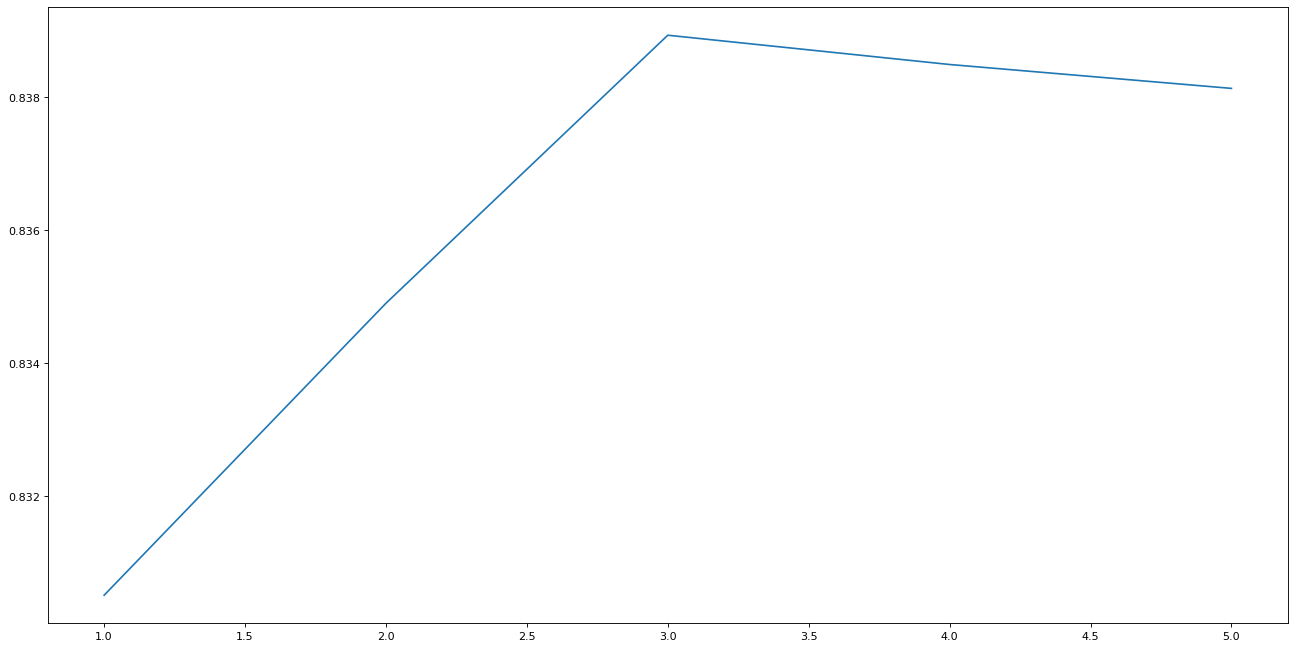

In [36]:
# Finding the best min_child_weight for model.

test = []
for i in range(5):
  XGBR = XGBRegressor(n_estimators = 1625, max_depth = 5, min_child_weight = 4, learning_rate = 0.01*i + 0.01)
  XGBR.fit(X_train, y_train)
  y_pred = XGBR.predict(X_test)
  score = r2_score(y_test, y_pred)
  test.append(score)

plt.figure(figsize = (20,10), dpi = 80)
plt.plot(range(1,6), test)
plt.show()

In [37]:
XG = XGBRegressor(n_estimators = 1625, max_depth = 5, min_child_weight = 4, learning_rate = 0.03)
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
print("XGBRegressor score:", XG.score(X_test, y_test))
print("XGBRegressor MSE:", mean_squared_error(y_test, y_pred))

XGBRegressor score: 0.8389352731333348
XGBRegressor MSE: 224397247410.49625
